# Transient Search in Fermi LAT 3HFL galactic center data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path

import pandas as pd

from astropy import units as u
from astropy.coordinates import Angle, SkyCoord
from astropy.coordinates.angle_utilities import angular_separation
from astropy.table import Table, unique
from regions import CircleSkyRegion
from gammapy.data import DataStore
from gammapy.datasets import MapDataset
from gammapy.maps import WcsGeom, MapAxis, Map, MapCoord

from gammapy.data import EventList


## Loading datasets

In [2]:
import urllib.request
local_filename, headers = urllib.request.urlretrieve("https://github.com/gammapy/gammapy-fermi-lat-data/raw/master/3fhl/galactic-center/fermi-3fhl-gc-events.fits.gz", "fermi-3fhl-gc-events.fits.gz")
events = EventList.read(local_filename)
print(events)

EventList
---------

  Instrument       : LAT
  Telescope        : GLAST
  Obs. ID          : 

  Number of events : 32843
  Event rate       : 0.000 1 / s

  Time start       : 54682.65603222222
  Time stop        : 57236.96833546296

  Min. energy      : 1.00e+04 MeV
  Max. energy      : 1.92e+06 MeV
  Median energy    : 1.58e+04 MeV




In [3]:
events.table

ENERGY,RA,DEC,L,B,THETA,PHI,ZENITH_ANGLE,EARTH_AZIMUTH_ANGLE,TIME,EVENT_ID,RUN_ID,RECON_VERSION,CALIB_VERSION,EVENT_CLASS,EVENT_TYPE,CONVERSION_TYPE,LIVETIME,DIFRSP0,DIFRSP1,DIFRSP2,DIFRSP3,DIFRSP4
MeV,deg,deg,deg,deg,deg,deg,deg,deg,s,,,,,,,,s,,,,,
float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,int32,int32,int16,int16[3],bool[32],bool[32],int16,float64,float32,float32,float32,float32,float32
12186.642,260.45935,-33.553337,353.36273,1.7538676,71.977325,125.50694,59.22307,231.79672,239572401.29222104,1823040,239571670,0,0 .. 0,False .. True,False .. True,0,238.57837238907814,0.0,0.0,0.0,0.0,0.0
25496.598,261.37506,-34.395004,353.09607,0.6520652,42.49406,278.49347,41.092773,227.89838,239577842.16217342,550833,239577663,0,0 .. 0,False .. True,False .. False,1,176.16850754618645,0.0,0.0,0.0,0.0,0.0
15621.498,259.56973,-33.409416,353.05673,2.4450684,64.32412,234.22194,66.526794,232.75734,239578244.7997108,1353175,239577663,0,0 .. 0,False .. True,False .. False,1,9.392075657844543,0.0,0.0,0.0,0.0,0.0
12816.32,273.95883,-25.340391,6.45856,-4.0548873,43.292503,142.87392,13.232716,108.02273,239605914.66160735,9636241,239601276,0,0 .. 0,False .. True,False .. False,1,4.034786552190781,0.0,0.0,0.0,0.0,0.0
18988.387,260.8568,-36.355804,351.23734,-0.101912394,26.916113,290.39337,23.8726,212.91147,239611913.14460415,11233188,239606871,0,0 .. 0,False .. True,False .. True,0,131.60132896900177,0.0,0.0,0.0,0.0,0.0
11610.23,266.15518,-26.224436,2.1986027,1.6034819,35.77363,274.53387,23.537594,232.64166,239623554.55414733,14156811,239618329,0,0 .. 0,False .. True,False .. False,1,74.98110938072205,0.0,0.0,0.0,0.0,0.0
13960.802,271.44742,-29.615316,1.6267247,-4.1431155,25.917883,238.0368,15.037035,123.32094,239634549.1748726,14140569,239629788,0,0 .. 0,False .. True,False .. False,1,106.37336817383766,0.0,0.0,0.0,0.0,0.0
10477.372,266.3981,-28.96814,359.97003,-0.011748177,39.091587,275.5457,33.02354,229.59308,239635161.87982982,15688393,239629788,0,0 .. 0,False .. True,False .. True,0,214.62817406654358,0.0,0.0,0.0,0.0,0.0


In [4]:

position_src = SkyCoord('266.41500888 -29.01', unit = 'deg',frame="icrs").icrs

position_src


<SkyCoord (ICRS): (ra, dec) in deg
    (266.41500888, -29.01)>

## Import Transient search library and perform searches

In [5]:
from gamma_transients import core

scanner = core.multiplet_scanner
plotter = core.triplet_hist2d_plotter

271.747681/1 (100.00%) 	| scanned 15429 events so far 	| 2-multiplets: 23 hits so far


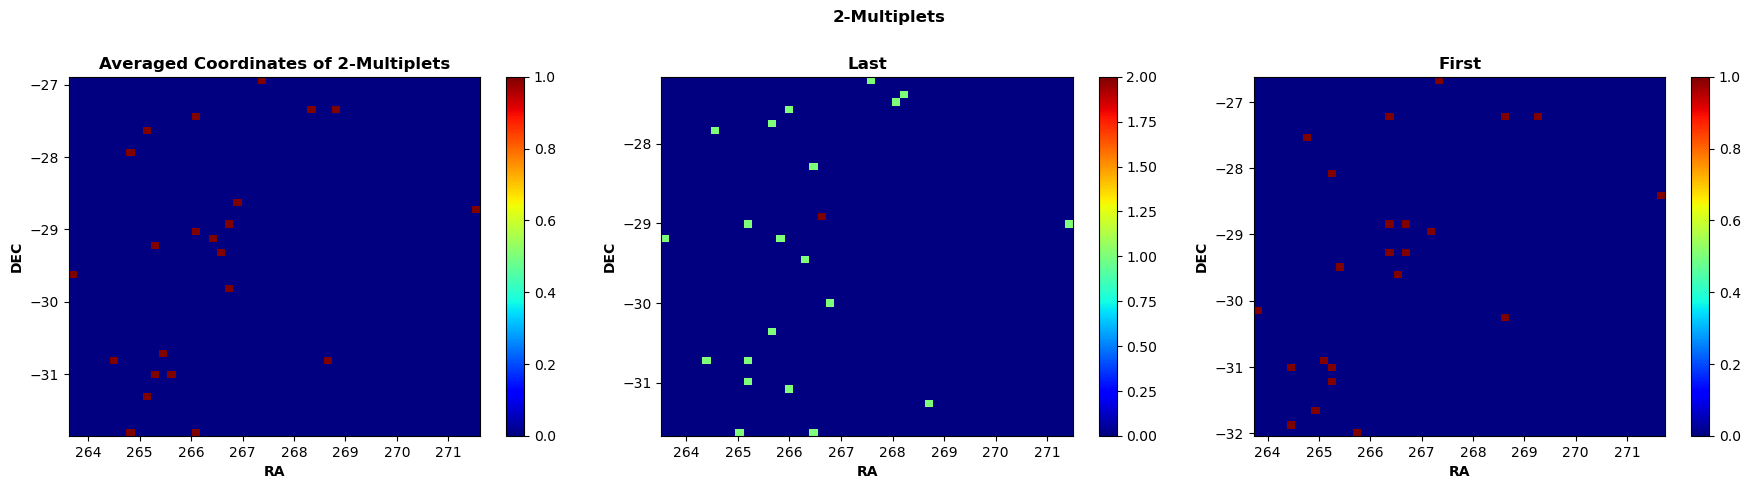

Nmax,ID,RA,DEC,TIME,ENERGY,dt,da
int64,int32[2],float32[2],float32[2],datetime64[ns][2],float32[2],float64,float64
2,1827439 .. 2053481,267.2827 .. 267.53946,-26.618414 .. -27.162382,2008-11-12T11:29:43.032437081 .. 2008-11-12T11:30:37.360272551,12304.014 .. 12906.022,54327835648.0,0.6015139919101017
2,12913145 .. 13057183,265.32977 .. 265.65198,-31.031775 .. -30.357908,2008-12-18T17:29:17.277233863 .. 2008-12-18T17:30:19.357602591,10227.2295 .. 18065.172,62080368640.0,0.7469347697213626
2,2915451 .. 3048328,266.37537 .. 265.8503,-28.895296 .. -29.223816,2009-05-29T18:39:47.625296021 .. 2009-05-29T18:40:52.990636552,10137.364 .. 12176.268,65365340416.0,0.6193609239690003
2,6680167 .. 6791108,266.6454 .. 266.38095,-29.299887 .. -29.435598,2009-06-04T12:01:00.888141269 .. 2009-06-04T12:01:58.354196632,29067.164 .. 13514.325,57466055424.0,0.297226224360911
2,864902 .. 1027234,265.00858 .. 265.13846,-31.621832 .. -30.967157,2010-02-02T09:59:30.737452621 .. 2010-02-02T10:00:52.496423895,11786.614 .. 18145.143,81758971392.0,0.6674341055504962
2,6689069 .. 6879375,264.49518 .. 265.03705,-31.930473 .. -31.579664,2010-02-04T22:42:13.274728173 .. 2010-02-04T22:43:27.642386789,24279.604 .. 20228.314,74367658496.0,0.645515489080043
2,4300861 .. 4324632,266.3039 .. 266.66934,-29.270996 .. -28.942524,2010-02-07T11:14:53.357330317 .. 2010-02-07T11:15:04.812425012,12047.319 .. 13069.268,11455094528.0,0.4913717374434658
2,2418191 .. 2567587,266.3201 .. 265.95255,-27.205164 .. -27.59695,2010-07-16T15:33:01.252260083 .. 2010-07-16T15:34:31.180454785,10328.344 .. 12005.256,89928194816.0,0.5372080146673639
2,6920554 .. 7056670,269.22897 .. 268.28357,-27.267767 .. -27.342798,2010-08-04T16:53:36.470689351 .. 2010-08-04T16:54:49.239613587,52911.254 .. 13828.996,72768924416.0,0.9483767795463406


In [6]:
multiplets = scanner(position_src, [events], dt_threshold=1e11, r_deg=1, r_area=5, Nmin=2, Nmax=2)
plotter(multiplets,50)
multiplets

271.747681/1 (100.00%) 	| scanned 15429 events so far 	| 2-multiplets: 183 hits so far


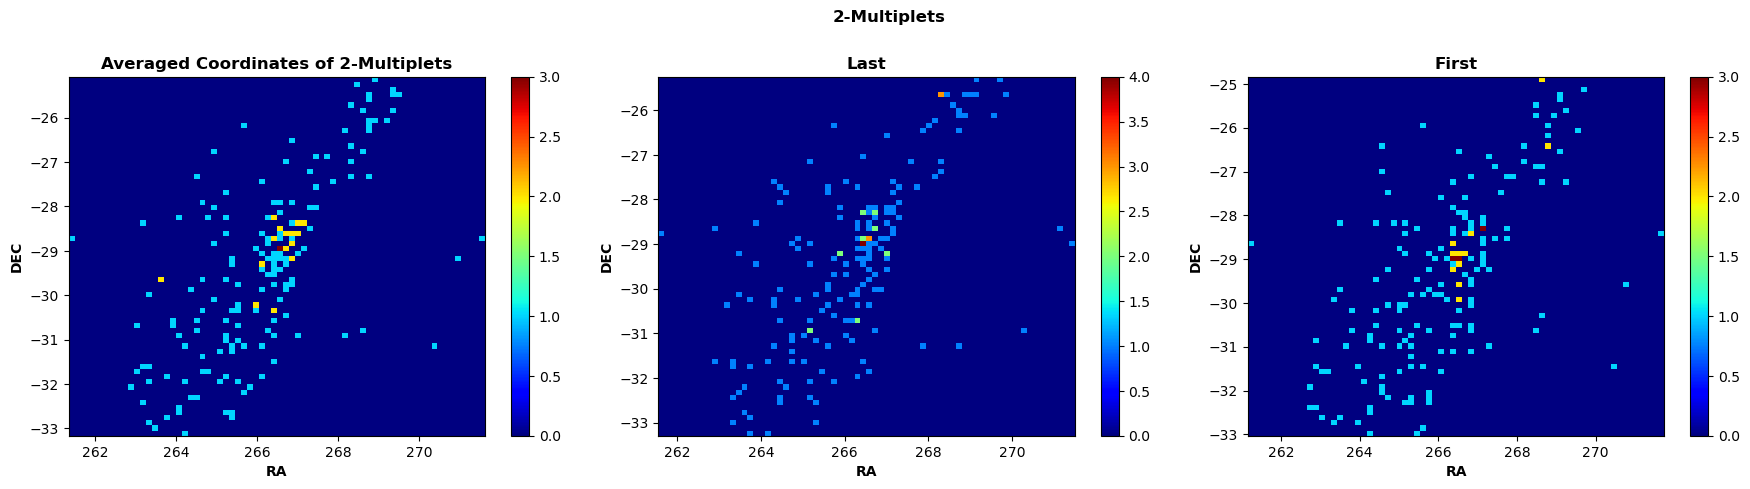

Nmax,ID,RA,DEC,TIME,ENERGY,dt,da
int64,int32[2],float32[2],float32[2],datetime64[ns][2],float32[2],float64,float64
2,12626484 .. 14186184,264.52255 .. 264.79855,-31.730831 .. -31.116806,2008-08-06T09:48:18.573991889 .. 2008-08-06T09:57:19.314452196,15236.758 .. 36314.297,540740460288.0,0.6732038191376308
2,3464661 .. 3908931,266.40958 .. 265.96906,-29.003975 .. -29.627218,2008-08-22T16:31:32.933552766 .. 2008-08-22T16:35:53.671327049,14190.258 .. 13745.556,260737774336.0,0.7632111201148001
2,357572 .. 1600512,266.59128 .. 266.24353,-29.976992 .. -30.75829,2008-08-26T17:09:49.199588621 .. 2008-08-26T17:20:23.530765289,238170.0 .. 14831.187,634331176704.0,0.8551927296734297
2,6250920 .. 7355933,262.76562 .. 262.90387,-32.41185 .. -31.658926,2008-09-11T08:06:20.557997251 .. 2008-09-11T08:14:00.451718951,14298.781 .. 10779.457,459893721600.0,0.7655103364269851
2,6399096 .. 8241554,266.4654 .. 266.57123,-29.114922 .. -28.858639,2008-09-21T05:10:19.450372810 .. 2008-09-21T05:21:41.421747828,25185.164 .. 10668.083,681971374848.0,0.27727588393349334
2,3038750 .. 4589388,264.3373 .. 263.93173,-28.128922 .. -28.489473,2008-10-02T08:53:17.089048589 .. 2008-10-02T09:01:42.226904416,11698.991 .. 41586.09,505137855744.0,0.5426708363535518
2,5941868 .. 6302902,267.41116 .. 266.63922,-28.55565 .. -28.14844,2008-10-28T03:25:40.192574734 .. 2008-10-28T03:28:51.539764041,64300.758 .. 10874.885,191347189248.0,0.872763261902831
2,5747794 .. 7591644,261.15125 .. 261.53943,-28.625732 .. -28.743818,2008-11-07T21:10:04.853664542 .. 2008-11-07T21:26:19.651883746,36180.78 .. 13524.684,974798219264.0,0.4057471787621458
2,1827439 .. 2053481,267.2827 .. 267.53946,-26.618414 .. -27.162382,2008-11-12T11:29:43.032437081 .. 2008-11-12T11:30:37.360272551,12304.014 .. 12906.022,54327835648.0,0.6015139919101017


In [7]:
multiplets = scanner(position_src, [events], dt_threshold=1e12, r_deg=1, r_area=5, Nmin=2, Nmax=2)
plotter(multiplets,70)
multiplets

268.836241/1 (100.00%) 	| scanned 15429 events so far 	| 3-multiplets: 19 hits so far


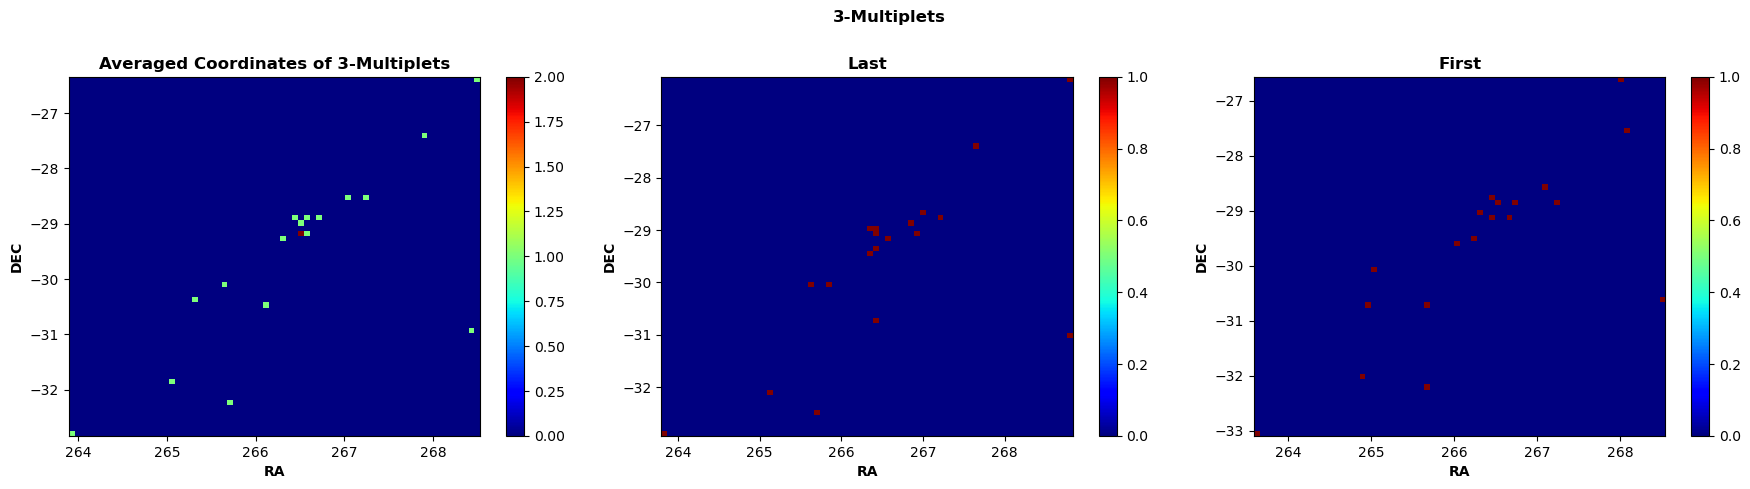

Nmax,ID,RA,DEC,TIME,ENERGY,dt,da
int64,int32[3],float32[3],float32[3],datetime64[ns][3],float32[3],float64,float64
3,6399096 .. 8441456,266.4654 .. 266.41592,-29.114922 .. -29.029953,2008-09-21T05:10:19.450372810 .. 2008-09-21T06:56:11.486411119,25185.164 .. 17812.08,6352036038144.0,0.27727588393349334
3,11309870 .. 1059626,267.2575 .. 266.97794,-28.853441 .. -28.629839,2009-05-01T18:10:11.094868714 .. 2009-05-01T18:48:40.018747920,10596.468 .. 12086.676,2308923879168.0,0.8104791322250705
3,4584194 .. 6791108,266.49918 .. 266.38095,-28.833458 .. -29.435598,2009-06-04T11:41:38.379744405 .. 2009-06-04T12:01:58.354196632,11519.814 .. 13514.325,1219974452224.0,0.6136369179774823
3,9298336 .. 7511593,265.0698 .. 265.87964,-30.085693 .. -30.00368,2009-07-20T22:00:03.729244823 .. 2009-07-20T23:21:21.219618315,12334.401 .. 20371.07,4877490373376.0,0.884942963136347
3,408604 .. 4582918,266.04865 .. 266.40536,-29.593395 .. -28.929054,2010-05-21T17:44:28.334328884 .. 2010-05-21T18:21:13.153250391,17378.4 .. 13346.339,2204818921472.0,0.7540544183098962
3,2110869 .. 4613600,267.0697 .. 266.8659,-28.554375 .. -28.884243,2011-09-17T18:31:59.390724773 .. 2011-09-17T18:52:52.700855250,11912.6875 .. 12856.597,1253310130432.0,0.7097666866183707
3,3733405 .. 3628756,265.69604 .. 266.44864,-30.670132 .. -30.69042,2012-04-07T20:50:20.362926239 .. 2012-04-07T22:38:10.585654492,11850.4375 .. 13660.439,6470222728192.0,0.9314293709009193
3,10068465 .. 376719,268.0793 .. 267.62265,-27.50769 .. -27.437162,2013-12-30T23:10:48.227199608 .. 2013-12-31T01:14:58.891453141,11543.905 .. 131373.94,7450664253696.0,0.46207917175893604
3,6772615 .. 3959511,266.7457 .. 266.34796,-28.887253 .. -28.959166,2014-03-27T15:32:04.354814405 .. 2014-03-27T16:46:11.739127988,12432.418 .. 21736.115,4447384313600.0,0.4041844256420565


In [8]:
multiplets = scanner(position_src, [events], dt_threshold=1e13, r_deg=1, r_area=5, Nmin=3, Nmax=3)
plotter(multiplets,70)
multiplets

269.376431/1 (100.00%) 	| scanned 15429 events so far 	| 4-multiplets: 315 hits so far


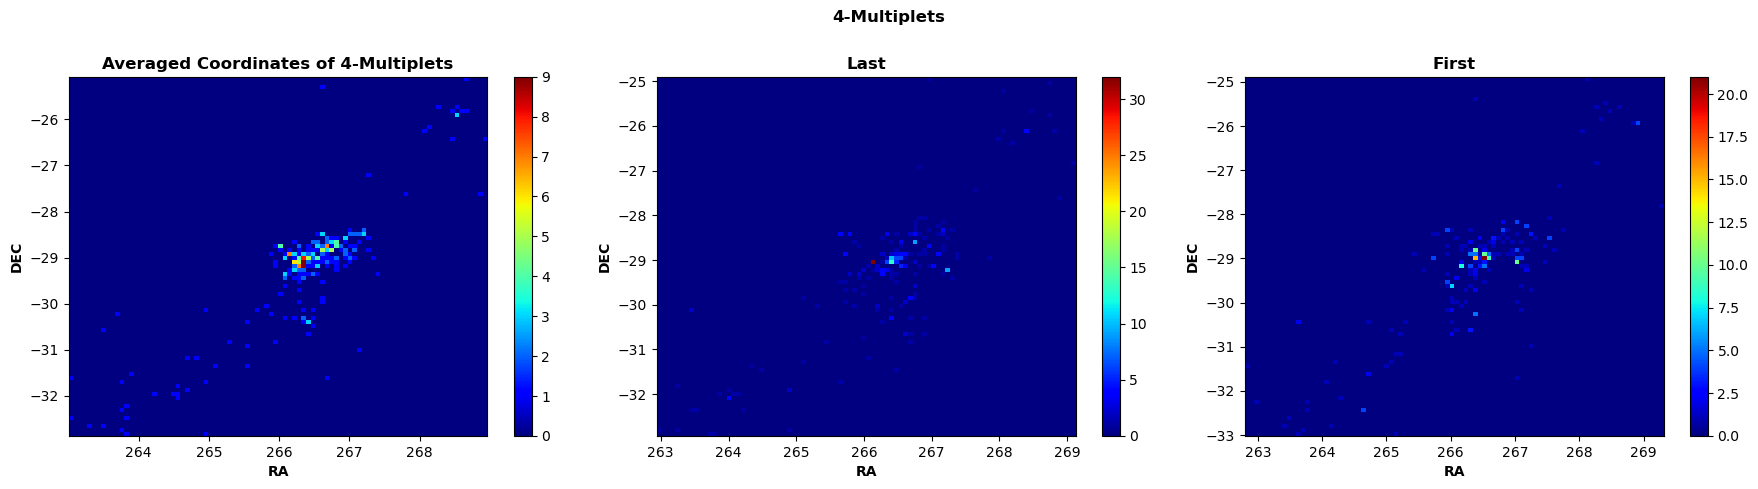

Nmax,ID,RA,DEC,TIME,ENERGY,dt,da
int64,int32[4],float32[4],float32[4],datetime64[ns][4],float32[4],float64,float64
4,2361614 .. 3908931,266.477 .. 265.96906,-29.037224 .. -29.627218,2008-08-21T14:49:50.301830972 .. 2008-08-22T16:35:53.671327049,15433.841 .. 13745.556,92763369496064.0,0.7785184363835669
4,7976837 .. 2523761,266.0966 .. 266.41843,-29.444557 .. -28.97597,2008-08-22T06:50:53.088748807 .. 2008-08-23T01:52:28.575957621,10079.743 .. 13230.513,68495487208704.0,0.7912393889327417
4,3464661 .. 158124,266.40958 .. 266.63635,-29.003975 .. -29.903355,2008-08-22T16:31:32.933552766 .. 2008-08-23T19:04:45.939432943,14190.258 .. 20846.121,95593005880320.0,0.9743863718337594
4,3703068 .. 3912166,265.9937 .. 266.23624,-28.320547 .. -29.118755,2008-09-02T15:02:36.466692293 .. 2008-09-03T16:31:49.948110158,82128.64 .. 15360.272,91753481417728.0,0.9969556810666932
4,6938587 .. 5771466,266.67612 .. 266.76047,-28.693298 .. -29.06034,2008-09-13T09:25:28.141526097 .. 2008-09-14T10:38:40.017348463,44364.77 .. 29101.98,90791875822336.0,0.5469695631618958
4,5895902 .. 8487793,266.9674 .. 266.75568,-28.603191 .. -28.301674,2008-09-17T04:03:40.386713589 .. 2008-09-18T04:15:43.013629282,11265.049 .. 26237.773,87122626915584.0,0.9935706131394394
4,7527027 .. 5422132,267.6155 .. 266.94168,-28.822403 .. -28.337656,2008-10-16T22:26:47.067332948 .. 2008-10-17T20:32:05.080153758,13108.643 .. 38892.234,79518012820992.0,0.8300746539184455
4,5391257 .. 4565689,267.1223 .. 266.2457,-28.633062 .. -28.857233,2008-10-19T07:40:40.538889760 .. 2008-10-20T07:26:15.855546976,12533.084 .. 12744.627,85535316657152.0,0.9048262912771636
4,6898355 .. 8044275,266.50638 .. 266.48032,-28.966135 .. -29.09093,2008-10-30T22:06:31.146922911 .. 2008-10-31T11:16:16.308952386,19324.418 .. 11821.167,47385162029312.0,0.9634770461312927


In [9]:
multiplets = scanner(position_src, [events], dt_threshold=1e14, r_deg=1, r_area=5, Nmin=4, Nmax=4)
plotter(multiplets,90)
multiplets

268.949771/1 (100.00%) 	| scanned 15429 events so far 	| 5-multiplets: 48 hits so far


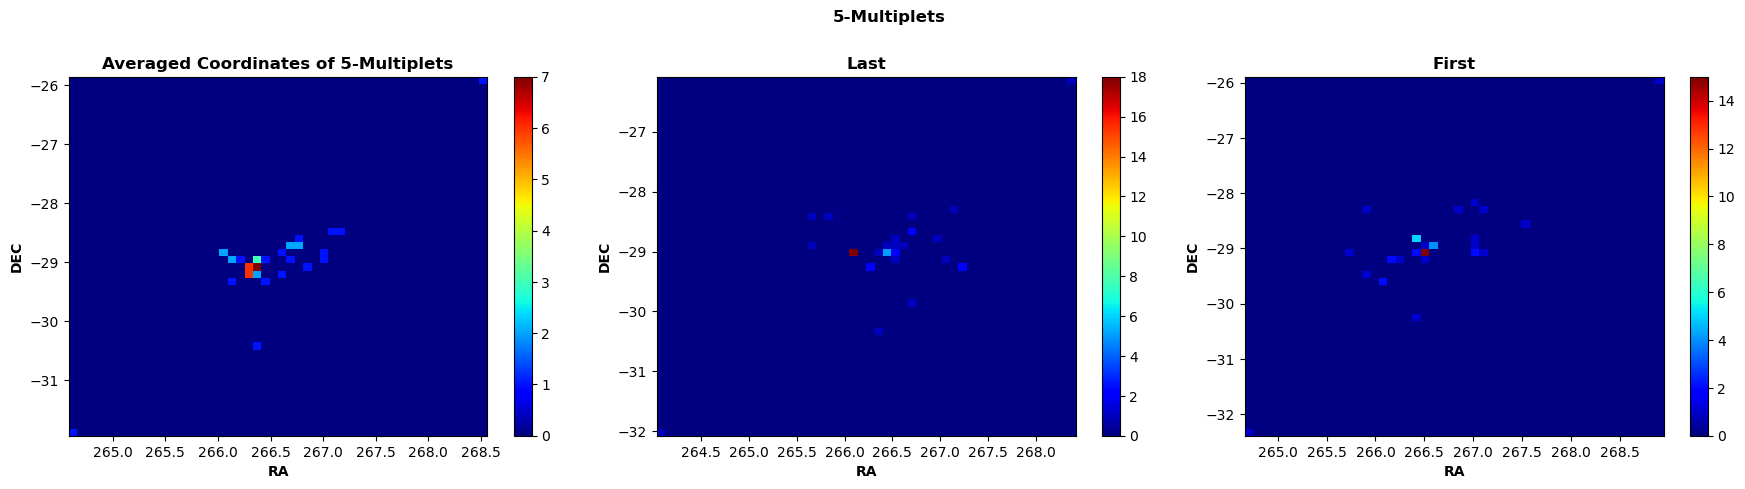

Nmax,ID,RA,DEC,TIME,ENERGY,dt,da
int64,int32[5],float32[5],float32[5],datetime64[ns][5],float32[5],float64,float64
5,8455247 .. 9260303,267.01517 .. 266.71948,-28.772558 .. -28.62107,2009-06-04T00:46:35.829489673 .. 2009-06-04T21:38:56.234818334,13731.846 .. 11972.588,75140405328640.0,0.9204371074054751
5,3002636 .. 3314048,267.56183 .. 267.17615,-28.545456 .. -28.338757,2009-07-15T10:44:50.747424597 .. 2009-07-16T14:01:45.355901117,11739.254 .. 12297.052,98214608476672.0,0.892315424918226
5,13415588 .. 4582918,266.49594 .. 266.40536,-29.022926 .. -28.929054,2010-05-21T11:16:31.815506930 .. 2010-05-21T18:21:13.153250391,130560.734 .. 13346.339,25481337743360.0,0.8634066965618301
5,13415588 .. 2052404,266.49594 .. 266.4254,-29.022926 .. -29.056221,2010-05-21T11:16:31.815506930 .. 2010-05-22T03:43:48.778650934,130560.734 .. 17759.092,59236963143936.0,0.8634066965618301
5,13415588 .. 10455720,266.49594 .. 266.12082,-29.022926 .. -29.035631,2010-05-21T11:16:31.815506930 .. 2010-05-22T13:33:04.553799326,130560.734 .. 35223.92,94592738292480.0,0.8634066965618301
5,13415588 .. 2052404,266.49594 .. 266.4254,-29.022926 .. -29.056221,2010-05-21T11:16:31.815506930 .. 2010-05-22T03:43:48.778650934,130560.734 .. 17759.092,59236963143936.0,0.8634066965618301
5,13415588 .. 10455720,266.49594 .. 266.12082,-29.022926 .. -29.035631,2010-05-21T11:16:31.815506930 .. 2010-05-22T13:33:04.553799326,130560.734 .. 35223.92,94592738292480.0,0.8634066965618301
5,13415588 .. 10455720,266.49594 .. 266.12082,-29.022926 .. -29.035631,2010-05-21T11:16:31.815506930 .. 2010-05-22T13:33:04.553799326,130560.734 .. 35223.92,94592738292480.0,0.8634066965618301
5,13415588 .. 2052404,266.49594 .. 266.4254,-29.022926 .. -29.056221,2010-05-21T11:16:31.815506930 .. 2010-05-22T03:43:48.778650934,130560.734 .. 17759.092,59236963143936.0,0.43515777587890625


In [10]:
multiplets = scanner(position_src, [events], dt_threshold=1e14, r_deg=1, r_area=5, Nmin=5, Nmax=5)
plotter(multiplets,50)
multiplets